In [2]:
import os 
os.chdir("D:/edvisor data science path/Practice_Python")
os.getcwd()

'D:\\edvisor data science path\\Practice_Python'

In [3]:
#import the usefull libraries 
import pandas as pd
import matplotlib as mlt
import numpy as np
from fancyimpute import KNN
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange,uniform
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier 
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import scipy.stats 
from scipy.stats import chi2_contingency
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [4]:
#for visualizations(to use ggplot) import some usefull libraries 
from pandas.api.types import CategoricalDtype
from plotnine import *
%matplotlib inline

In [5]:
#load the training dataset 
training_data=pd.read_csv("train.csv",sep=',')

In [6]:
#load the test dataset 
test_data=pd.read_csv("test.csv",sep=',')

In [ ]:
#start data Preprocessign 
#as given in the problem statement given dataset have one binary target column,one string column and rest of all are numeric data with some missing values  
#proceeding with the assumptions above now start the data analysis 

In [5]:
#missing value analysis 
#Creat dataframe with missing percentage 
missing_val=pd.DataFrame(training_data.isnull().sum())

#reset index
missing_val=missing_val.reset_index()

#Rename variable
missing_val=missing_val.rename(columns={'index':'variables',0:'missing_percentage'})


In [6]:
#calculate percentage
missing_val['missing_percentage']=(missing_val['missing_percentage']/len(training_data))*100

In [7]:
#sort in decending order 
missing_val=missing_val.sort_values('missing_percentage',ascending=False).reset_index(drop=True)

In [9]:
#missing value analysis for test data

#Creat dataframe with missing percentage 
missing_val_1=pd.DataFrame(test_data.isnull().sum())

#reset index
missing_val_1=missing_val_1.reset_index()

#Rename variable
missing_val_1=missing_val_1.rename(columns={'index':'variables',0:'missing_percentage'})

In [10]:
#calculate percentage
missing_val_1['missing_percentage']=(missing_val_1['missing_percentage']/len(test_data))*100

In [13]:
#sort in decending order 
missing_val_1=missing_val_1.sort_values('missing_percentage',ascending=False).reset_index(drop=True)

In [11]:
#lets check the training_data datasets what percentage of missing values they have
missing_val

,variables,missing_percentage
0,ID_code,0.0
1,var_136,0.0
2,var_126,0.0
3,var_127,0.0
4,var_128,0.0
5,var_129,0.0
6,var_130,0.0
7,var_131,0.0
8,var_132,0.0
9,var_133,0.0


In [ ]:
#the output above shows that training_data does not have any missing value 

In [ ]:
#lets check for test dataset 

In [14]:
missing_val_1

,variables,missing_percentage
0,ID_code,0.0
1,var_137,0.0
2,var_127,0.0
3,var_128,0.0
4,var_129,0.0
5,var_130,0.0
6,var_131,0.0
7,var_132,0.0
8,var_133,0.0
9,var_134,0.0


In [ ]:
#the test data also does not have any missing value 

In [ ]:
#so we are proceeding further 

In [15]:
#save output result
missing_val.to_csv("Missing_percentage.csv",index=False)

In [16]:
missing_val_1.to_csv("Missing_percentage_1.csv",index=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x11456f28>,
 'caps': [<matplotlib.lines.Line2D at 0x125d45f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x11456b00>],
 'medians': [<matplotlib.lines.Line2D at 0x125d4c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x125d4fd0>],
 'means': []}

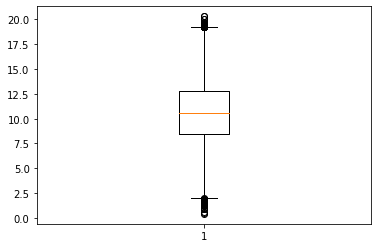

In [8]:
##outlayer Analysis
#plot boxplotto vsualize outliears 
#cheching one by one for every variable 
%matplotlib inline
plt.boxplot(training_data['var_0'])

{'whiskers': [<matplotlib.lines.Line2D at 0x12edb2e8>,
 'caps': [<matplotlib.lines.Line2D at 0x12edb9e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x12ecfeb8>],
 'medians': [<matplotlib.lines.Line2D at 0x12ecfb70>],
 'fliers': [<matplotlib.lines.Line2D at 0x12ee73c8>],
 'means': []}

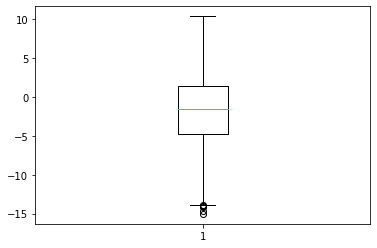

In [20]:
%matplotlib inline
plt.boxplot(training_data['var_1'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29bea8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x29beafd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29bea4a8>],
 'medians': [<matplotlib.lines.Line2D at 0x29bf26a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29bf29e8>],
 'means': []}

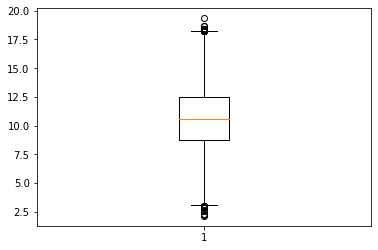

In [75]:
%matplotlib inline
plt.boxplot(training_data['var_2'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29c46eb8>,
 'caps': [<matplotlib.lines.Line2D at 0x29c535f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x29c46a90>],
 'medians': [<matplotlib.lines.Line2D at 0x29c53c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x29c53fd0>],
 'means': []}

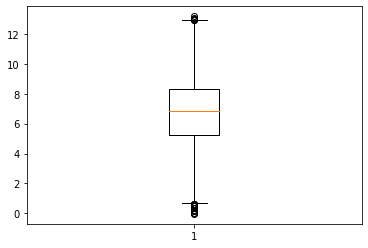

In [76]:
%matplotlib inline
plt.boxplot(training_data['var_3'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29caed68>,
 'caps': [<matplotlib.lines.Line2D at 0x29cb94a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x29cae940>],
 'medians': [<matplotlib.lines.Line2D at 0x29cb9b38>],
 'fliers': [<matplotlib.lines.Line2D at 0x29cb9e80>],
 'means': []}

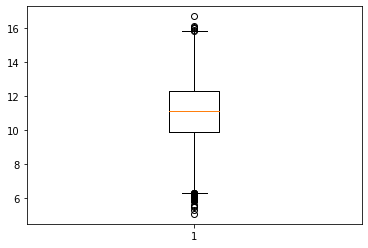

In [77]:
%matplotlib inline
plt.boxplot(training_data['var_4'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29d167f0>,
 'caps': [<matplotlib.lines.Line2D at 0x29d16ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29d163c8>],
 'medians': [<matplotlib.lines.Line2D at 0x29d225c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29d22908>],
 'means': []}

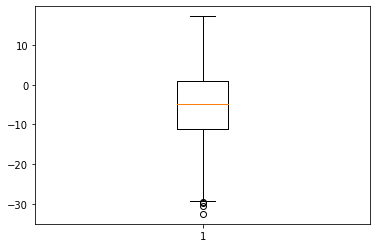

In [78]:
%matplotlib inline
plt.boxplot(training_data['var_5'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29d72c88>,
 'caps': [<matplotlib.lines.Line2D at 0x29d7f3c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x29d72898>],
 'medians': [<matplotlib.lines.Line2D at 0x29d7fa58>],
 'fliers': [<matplotlib.lines.Line2D at 0x29d7fda0>],
 'means': []}

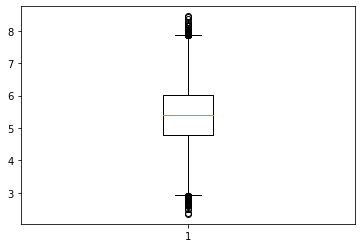

In [79]:
%matplotlib inline
plt.boxplot(training_data['var_6'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29ddc5c0>,
 'caps': [<matplotlib.lines.Line2D at 0x29ddccc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29ddc198>],
 'medians': [<matplotlib.lines.Line2D at 0x29de7390>],
 'fliers': [<matplotlib.lines.Line2D at 0x29de76d8>],
 'means': []}

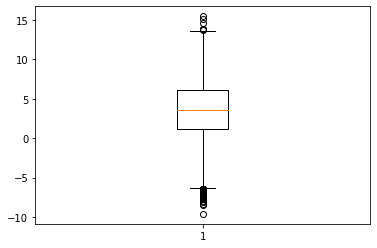

In [80]:
%matplotlib inline
plt.boxplot(training_data['var_89'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29e35f60>,
 'caps': [<matplotlib.lines.Line2D at 0x29e3f6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29e35b38>],
 'medians': [<matplotlib.lines.Line2D at 0x29e3fd30>],
 'fliers': [<matplotlib.lines.Line2D at 0x29e3fe10>],
 'means': []}

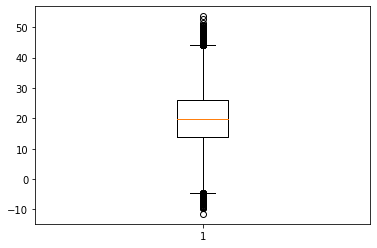

In [81]:
%matplotlib inline
plt.boxplot(training_data['var_172'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29e9bf60>,
 'caps': [<matplotlib.lines.Line2D at 0x29ea96a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29e9bb38>],
 'medians': [<matplotlib.lines.Line2D at 0x29ea9d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x29ea9e10>],
 'means': []}

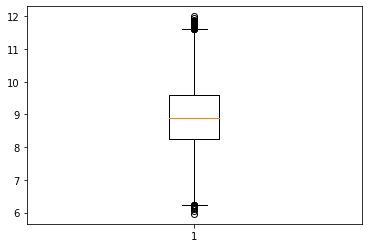

In [82]:
%matplotlib inline
plt.boxplot(training_data['var_197'])

{'whiskers': [<matplotlib.lines.Line2D at 0x5451cc0>,
 'caps': [<matplotlib.lines.Line2D at 0x545d400>,
 'boxes': [<matplotlib.lines.Line2D at 0x54518d0>],
 'medians': [<matplotlib.lines.Line2D at 0x545da90>],
 'fliers': [<matplotlib.lines.Line2D at 0x545ddd8>],
 'means': []}

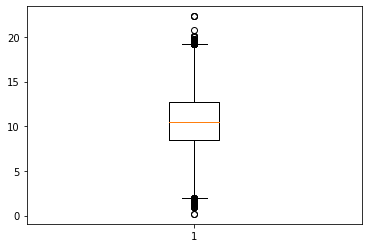

In [21]:
#outlayer analysis for test data 
%matplotlib inline
plt.boxplot(test_data['var_0'])

{'whiskers': [<matplotlib.lines.Line2D at 0x54a7ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x54a7a58>,
 'boxes': [<matplotlib.lines.Line2D at 0x54a7da0>],
 'medians': [<matplotlib.lines.Line2D at 0x54b5f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x54b5ef0>],
 'means': []}

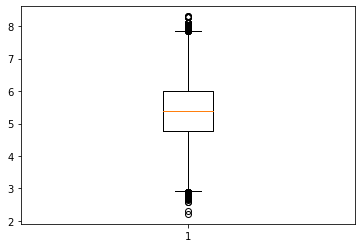

In [22]:
%matplotlib inline
plt.boxplot(test_data['var_6'])

{'whiskers': [<matplotlib.lines.Line2D at 0x5509fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x5517710>,
 'boxes': [<matplotlib.lines.Line2D at 0x5509be0>],
 'medians': [<matplotlib.lines.Line2D at 0x5517da0>],
 'fliers': [<matplotlib.lines.Line2D at 0x5517e80>],
 'means': []}

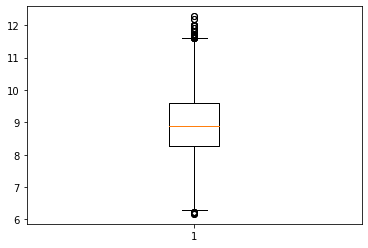

In [23]:
%matplotlib inline
plt.boxplot(test_data['var_197'])

{'whiskers': [<matplotlib.lines.Line2D at 0x556af28>,
 'caps': [<matplotlib.lines.Line2D at 0x5578668>,
 'boxes': [<matplotlib.lines.Line2D at 0x556ab38>],
 'medians': [<matplotlib.lines.Line2D at 0x5578cf8>],
 'fliers': [<matplotlib.lines.Line2D at 0x5578dd8>],
 'means': []}

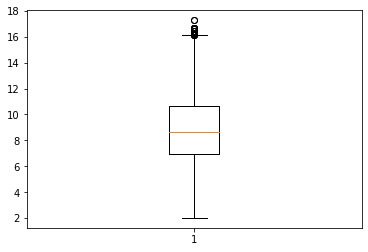

In [25]:
%matplotlib inline
plt.boxplot(test_data['var_88'])

In [ ]:
#from the above interpretation we can say that the data set have out layers 


In [10]:
#lets detect and delete the outlayers in training_data
#save the numeric variables names firts 

cnames=["var_0","var_1","var_2","var_3","var_4","var_5","var_6","var_7","var_8","var_9","var_11","var_12","var_13","var_14","var_15","var_16","var_17","var_18","var_19","var_20","var_21","var_22","var_23","var_24","var_25","var_26","var_27","var_28","var_29","var_30","var_31","var_32","var_33","var_34","var_35","var_36","var_37","var_38","var_39","var_40","var_41","var_42","var_43","var_44","var_45","var_46","var_47","var_48","var_49","var_50","var_51","var_52","var_53","var_54","var_55","var_56","var_57","var_58","var_59","var_60","var_61","var_62","var_63","var_64","var_65","var_66","var_67","var_68","var_69","var_70","var_71","var_72","var_73","var_74","var_75","var_76","var_77","var_78","var_79","var_80","var_81","var_82","var_83","var_84","var_85","var_86","var_87","var_88","var_89","var_90","var_91","var_92","var_92","var_93","var_94","var_95","var_96","var_97","var_98","var_99","var_100","var_101","var_102","var_103","var_104","var_105","var_106","var_107","var_108","var_109","var_110","var_111","var_112","var_113","var_114","var_115","var_116","var_117","var_118","var_119","var_120","var_121","var_122","var_123","var_124","var_125","var_126","var_127","var_128","var_129","var_130","var_131","var_132","var_133","var_134","var_135","var_136","var_137","var_138","var_139","var_140","var_141","var_142","var_143","var_144","var_145","var_146","var_147","var_148","var_149","var_150","var_151","var_152","var_153","var_154","var_155","var_156","var_157","var_158","var_159","var_160","var_161","var_162","var_163","var_164","var_165","var_166","var_167","var_168","var_169","var_170","var_171","var_172","var_173","var_174","var_175","var_176","var_177","var_178","var_179","var_180","var_181","var_182","var_183","var_184","var_185","var_186","var_187","var_188","var_189","var_190","var_191","var_192","var_193","var_194","var_195","var_196","var_197","var_198","var_199"]

In [11]:
for i in cnames:
    print(i)
    q75,q25=np.percentile(training_data.loc[:,i],[75,25])
    iqr=q75-q25
    minimum=q25-(iqr*1.5)
    maximum=q75+(iqr*1.5)
    print(minimum)
    print(maximum)
    training_data=training_data.drop(training_data[training_data.loc[:,i]<minimum].index)
    traininig_data=training_data.drop(training_data[training_data.loc[:,i]>maximum].index)

var_0
1.9973250000000018
19.214725
var_1
-13.888275
10.506725
var_2
3.031699999999999
18.207700000000003
var_3
0.6491000000000016
12.929099999999998
var_4
6.31635
15.827950000000001
var_5
-29.3898875
19.112212500000002
var_6
2.914649999999999
7.855850000000001
var_7
6.206262499999999
26.840362500000005
var_8
-10.2011625
10.8213375
var_9
3.670287499999999
11.532987500000003
var_11
-20.054775
13.399425
var_12
13.488700000000001
14.569499999999998
var_13
-5.7323625000000025
23.080337500000006
var_14
0.5475999999999992
14.5044
var_15
13.345250000000002
15.792049999999998
var_16
2.0472125000000014
16.4605125
var_17
-24.979149999999997
13.692249999999996
var_18
-8.56895
38.76265
var_19
-11.953275
36.664325000000005
var_20
-5.250099999999998
31.7571
var_21
-5.757212500000001
40.3966875
var_22
-3.9846375000000007
12.460062500000001
var_23
1.4796125000000002
4.5583124999999995
var_24
-1.1845499999999998
22.279049999999998
var_25
12.845600000000001
14.4744
var_26
-20.67155
12.25765
var_27
-5.792

In [11]:
#feature selection 
df_corr=training_data.loc[:,cnames]


(array([169342.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  18704.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

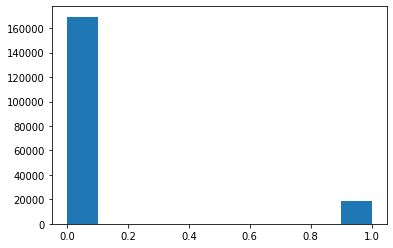

In [12]:
%matplotlib inline
plt.hist(training_data['target'])

In [13]:
corr=df_corr.corr()

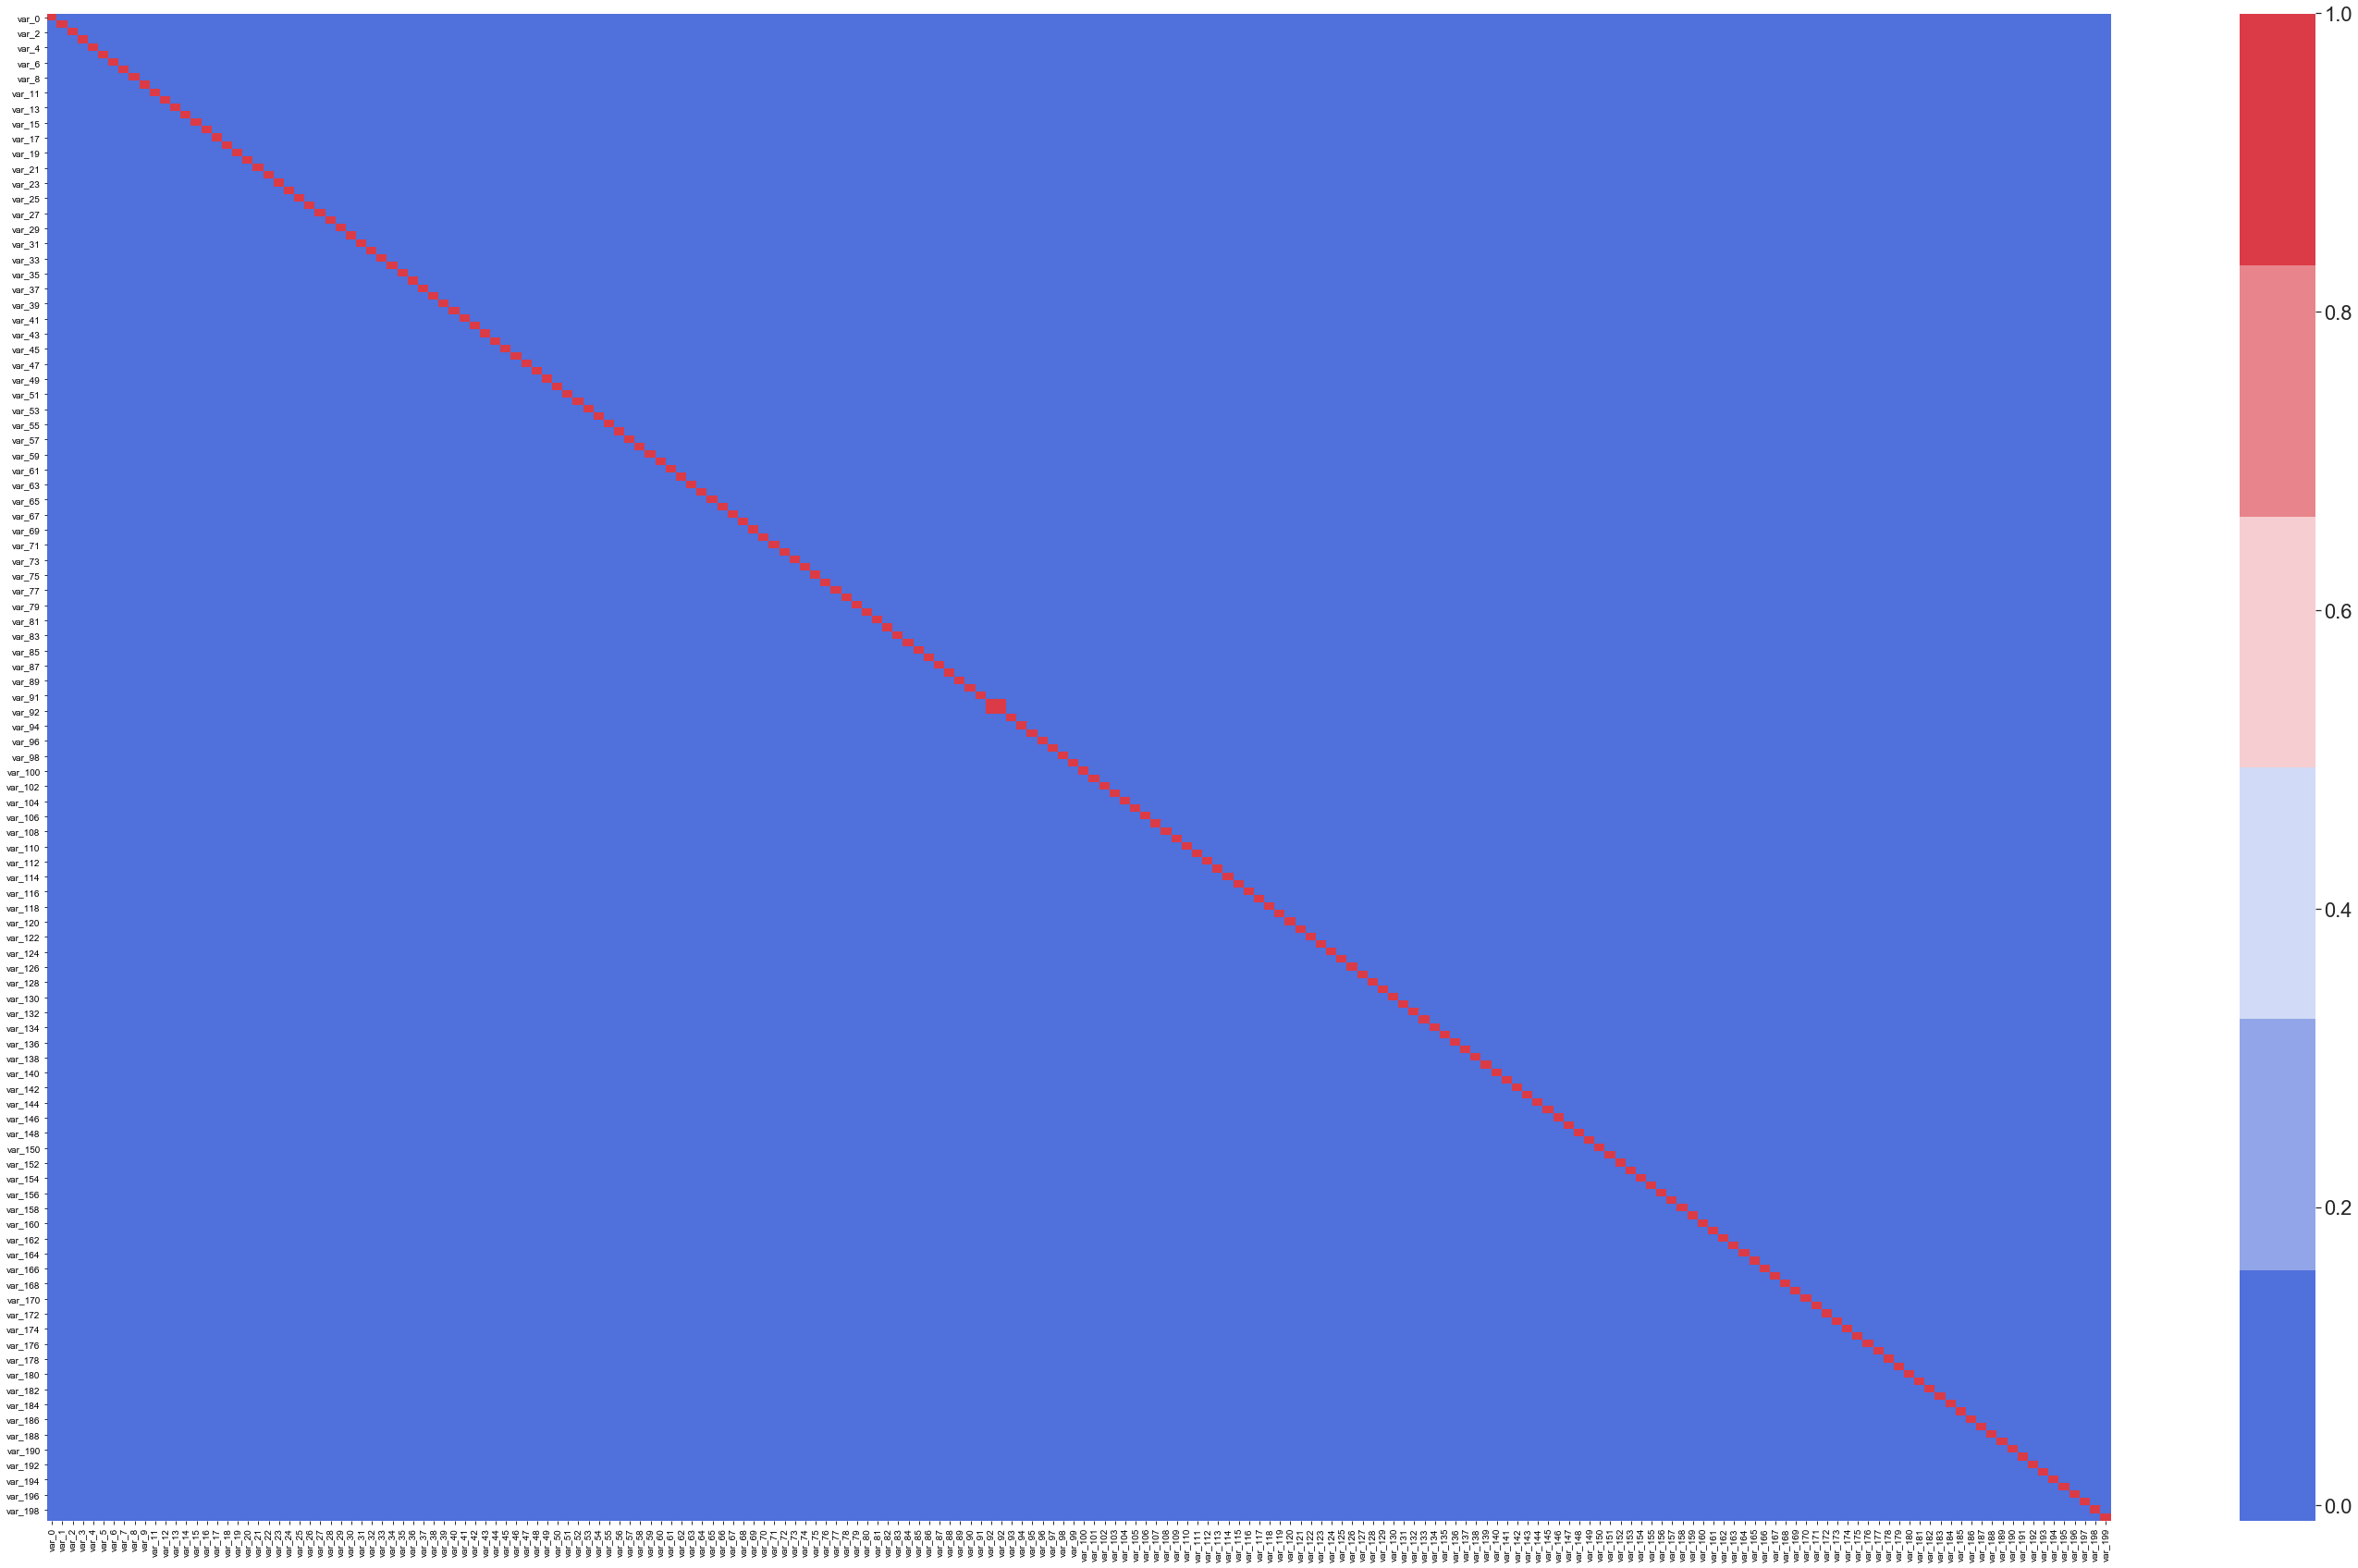

In [21]:
a4_dims = (50,30)
fig, ap = plt.subplots(figsize=a4_dims)
sns.set(font_scale=2)
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(260,10),ax=ap)

In [24]:
##feature scaling 
#saving the copy of the data
df=training_data.copy()
df1=test_data.copy()


(array([1.600e+01, 1.500e+01, 2.300e+01, 3.400e+01, 3.500e+01, 5.100e+01,
        5.300e+01, 5.300e+01, 8.200e+01, 1.000e+02, 1.550e+02, 1.620e+02,
        2.000e+02, 2.250e+02, 2.590e+02, 3.250e+02, 3.670e+02, 4.180e+02,
        4.790e+02, 5.410e+02, 6.150e+02, 6.940e+02, 8.450e+02, 9.040e+02,
        9.830e+02, 1.098e+03, 1.235e+03, 1.376e+03, 1.499e+03, 1.621e+03,
        1.719e+03, 1.886e+03, 2.053e+03, 2.116e+03, 2.302e+03, 2.356e+03,
        2.543e+03, 2.766e+03, 2.763e+03, 2.873e+03, 3.046e+03, 2.995e+03,
        3.200e+03, 3.203e+03, 3.283e+03, 3.249e+03, 3.347e+03, 3.445e+03,
        3.368e+03, 3.424e+03, 3.380e+03, 3.555e+03, 3.595e+03, 3.519e+03,
        3.359e+03, 3.463e+03, 3.461e+03, 3.332e+03, 3.327e+03, 3.385e+03,
        3.302e+03, 3.254e+03, 3.330e+03, 3.117e+03, 3.099e+03, 3.064e+03,
        3.010e+03, 2.913e+03, 2.972e+03, 3.050e+03, 3.021e+03, 3.214e+03,
        3.042e+03, 2.925e+03, 2.759e+03, 2.514e+03, 2.317e+03, 2.155e+03,
        2.060e+03, 2.014e+03, 1.941e+0

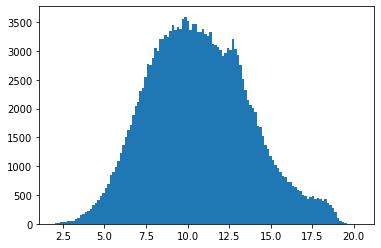

In [14]:
#normality check
%matplotlib inline
plt.hist(training_data['var_0'],bins='auto')

(array([4.000e+00, 2.000e+00, 3.000e+00, 9.000e+00, 6.000e+00, 8.000e+00,
        3.600e+01, 2.600e+01, 3.800e+01, 4.500e+01, 6.100e+01, 7.100e+01,
        1.100e+02, 1.440e+02, 1.580e+02, 2.310e+02, 3.180e+02, 3.270e+02,
        4.020e+02, 4.930e+02, 6.320e+02, 7.290e+02, 8.020e+02, 8.870e+02,
        1.128e+03, 1.203e+03, 1.408e+03, 1.525e+03, 1.658e+03, 1.696e+03,
        1.933e+03, 2.093e+03, 2.237e+03, 2.270e+03, 2.459e+03, 2.551e+03,
        2.653e+03, 2.761e+03, 2.702e+03, 2.825e+03, 2.830e+03, 2.923e+03,
        2.977e+03, 2.918e+03, 2.885e+03, 3.051e+03, 2.999e+03, 3.013e+03,
        3.153e+03, 3.160e+03, 3.172e+03, 3.277e+03, 3.323e+03, 3.341e+03,
        3.448e+03, 3.437e+03, 3.424e+03, 3.358e+03, 3.420e+03, 3.401e+03,
        3.393e+03, 3.460e+03, 3.497e+03, 3.443e+03, 3.348e+03, 3.385e+03,
        3.360e+03, 3.305e+03, 3.299e+03, 3.393e+03, 3.241e+03, 3.108e+03,
        3.022e+03, 3.048e+03, 2.925e+03, 2.880e+03, 2.676e+03, 2.553e+03,
        2.498e+03, 2.453e+03, 2.124e+0

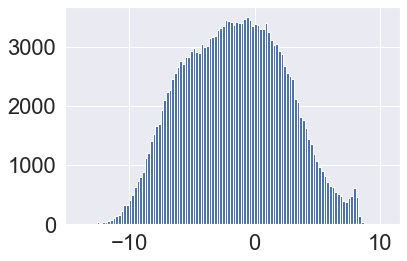

In [25]:
%matplotlib inline
plt.hist(training_data['var_1'],bins='auto')

(array([9.000e+00, 9.000e+00, 1.400e+01, 1.600e+01, 1.000e+01, 2.600e+01,
        4.200e+01, 3.400e+01, 3.600e+01, 5.800e+01, 6.600e+01, 7.700e+01,
        1.060e+02, 1.530e+02, 1.920e+02, 2.260e+02, 2.750e+02, 3.500e+02,
        3.880e+02, 4.080e+02, 4.960e+02, 6.420e+02, 7.370e+02, 8.220e+02,
        8.920e+02, 1.048e+03, 1.217e+03, 1.330e+03, 1.412e+03, 1.655e+03,
        1.798e+03, 1.944e+03, 2.054e+03, 2.219e+03, 2.346e+03, 2.607e+03,
        2.710e+03, 2.740e+03, 2.882e+03, 2.958e+03, 3.098e+03, 3.112e+03,
        3.177e+03, 3.277e+03, 3.331e+03, 3.336e+03, 3.290e+03, 3.331e+03,
        3.473e+03, 3.291e+03, 3.438e+03, 3.452e+03, 3.297e+03, 3.351e+03,
        3.236e+03, 3.327e+03, 3.258e+03, 3.210e+03, 3.218e+03, 3.220e+03,
        3.189e+03, 3.120e+03, 3.041e+03, 2.843e+03, 3.070e+03, 2.986e+03,
        2.952e+03, 2.832e+03, 3.034e+03, 3.506e+03, 3.942e+03, 3.694e+03,
        3.195e+03, 2.791e+03, 2.559e+03, 2.564e+03, 2.383e+03, 2.382e+03,
        2.154e+03, 2.119e+03, 1.906e+0

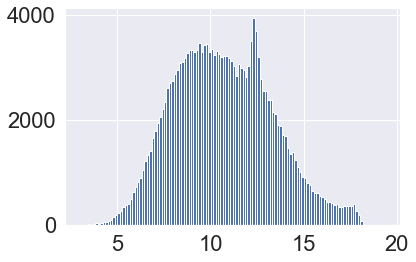

In [91]:
%matplotlib inline
plt.hist(training_data['var_2'],bins='auto')

(array([5.000e+00, 9.000e+00, 1.100e+01, 9.000e+00, 2.800e+01, 2.700e+01,
        4.000e+01, 3.800e+01, 5.800e+01, 9.300e+01, 8.400e+01, 1.070e+02,
        1.470e+02, 2.190e+02, 2.580e+02, 3.120e+02, 3.410e+02, 4.210e+02,
        4.900e+02, 6.010e+02, 6.850e+02, 7.770e+02, 8.910e+02, 1.075e+03,
        1.113e+03, 1.274e+03, 1.412e+03, 1.527e+03, 1.647e+03, 1.803e+03,
        1.932e+03, 1.970e+03, 2.186e+03, 2.140e+03, 2.346e+03, 2.417e+03,
        2.520e+03, 2.606e+03, 2.708e+03, 2.747e+03, 2.735e+03, 2.865e+03,
        2.915e+03, 3.130e+03, 3.021e+03, 3.025e+03, 3.099e+03, 3.103e+03,
        3.237e+03, 3.246e+03, 3.255e+03, 3.170e+03, 3.284e+03, 3.285e+03,
        3.173e+03, 3.365e+03, 3.376e+03, 3.381e+03, 3.325e+03, 3.367e+03,
        3.392e+03, 3.346e+03, 3.335e+03, 3.286e+03, 3.484e+03, 3.403e+03,
        3.410e+03, 3.368e+03, 3.288e+03, 3.382e+03, 3.314e+03, 3.121e+03,
        3.156e+03, 2.977e+03, 2.933e+03, 2.842e+03, 2.752e+03, 2.682e+03,
        2.550e+03, 2.445e+03, 2.189e+0

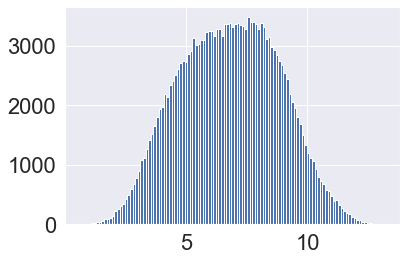

In [92]:
%matplotlib inline
plt.hist(training_data['var_3'],bins='auto')

(array([2.700e+01, 2.900e+01, 2.800e+01, 3.300e+01, 3.900e+01, 6.300e+01,
        8.400e+01, 1.040e+02, 1.180e+02, 1.380e+02, 1.660e+02, 1.860e+02,
        2.190e+02, 2.960e+02, 2.920e+02, 4.230e+02, 4.250e+02, 5.230e+02,
        5.700e+02, 6.830e+02, 7.290e+02, 8.120e+02, 8.930e+02, 1.057e+03,
        1.115e+03, 1.247e+03, 1.317e+03, 1.476e+03, 1.512e+03, 1.726e+03,
        1.835e+03, 1.933e+03, 2.013e+03, 2.164e+03, 2.140e+03, 2.293e+03,
        2.405e+03, 2.423e+03, 2.523e+03, 2.591e+03, 2.653e+03, 2.699e+03,
        2.848e+03, 2.820e+03, 2.747e+03, 2.897e+03, 2.948e+03, 3.012e+03,
        3.077e+03, 3.119e+03, 3.168e+03, 3.284e+03, 3.371e+03, 3.328e+03,
        3.459e+03, 3.542e+03, 3.413e+03, 3.518e+03, 3.472e+03, 3.479e+03,
        3.544e+03, 3.425e+03, 3.380e+03, 3.458e+03, 3.397e+03, 3.442e+03,
        3.326e+03, 3.398e+03, 3.348e+03, 3.270e+03, 3.186e+03, 3.082e+03,
        3.046e+03, 2.949e+03, 2.843e+03, 2.667e+03, 2.686e+03, 2.515e+03,
        2.433e+03, 2.300e+03, 2.144e+0

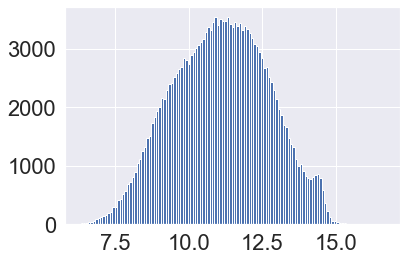

In [93]:
%matplotlib inline
plt.hist(training_data['var_4'],bins='auto')

(array([2.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 8.000e+00,
        8.000e+00, 1.600e+01, 2.000e+01, 4.900e+01, 4.800e+01, 6.100e+01,
        1.030e+02, 1.170e+02, 1.530e+02, 2.080e+02, 2.300e+02, 3.150e+02,
        4.040e+02, 5.130e+02, 6.130e+02, 7.260e+02, 8.190e+02, 9.770e+02,
        1.131e+03, 1.293e+03, 1.401e+03, 1.608e+03, 1.790e+03, 1.921e+03,
        2.096e+03, 2.248e+03, 2.286e+03, 2.410e+03, 2.554e+03, 2.567e+03,
        2.644e+03, 2.698e+03, 2.812e+03, 2.727e+03, 2.835e+03, 2.830e+03,
        2.897e+03, 2.909e+03, 2.964e+03, 3.009e+03, 2.951e+03, 3.030e+03,
        3.096e+03, 3.005e+03, 3.171e+03, 3.295e+03, 3.256e+03, 3.223e+03,
        3.209e+03, 3.251e+03, 3.298e+03, 3.266e+03, 3.299e+03, 3.263e+03,
        3.434e+03, 3.406e+03, 3.403e+03, 3.399e+03, 3.452e+03, 3.476e+03,
        3.539e+03, 3.522e+03, 3.544e+03, 3.534e+03, 3.541e+03, 3.517e+03,
        3.440e+03, 3.323e+03, 3.257e+03, 3.221e+03, 2.974e+03, 2.878e+03,
        2.779e+03, 2.440e+03, 2.238e+0

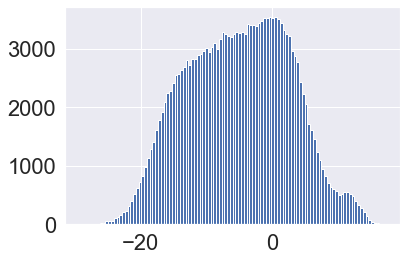

In [28]:
%matplotlib inline 
plt.hist(training_data['var_5'],bins='auto')

(array([1.600e+01, 3.800e+01, 3.000e+01, 2.800e+01, 4.600e+01, 4.900e+01,
        6.800e+01, 7.900e+01, 7.500e+01, 1.150e+02, 1.440e+02, 1.460e+02,
        1.970e+02, 2.700e+02, 2.440e+02, 3.080e+02, 3.310e+02, 4.200e+02,
        5.060e+02, 5.750e+02, 6.530e+02, 7.380e+02, 7.880e+02, 8.860e+02,
        1.050e+03, 1.122e+03, 1.245e+03, 1.423e+03, 1.471e+03, 1.556e+03,
        1.784e+03, 1.821e+03, 1.907e+03, 2.016e+03, 2.301e+03, 2.335e+03,
        2.519e+03, 2.519e+03, 2.831e+03, 2.901e+03, 2.813e+03, 3.030e+03,
        3.071e+03, 3.052e+03, 3.138e+03, 3.221e+03, 3.247e+03, 3.241e+03,
        3.309e+03, 3.406e+03, 3.266e+03, 3.336e+03, 3.339e+03, 3.363e+03,
        3.298e+03, 3.279e+03, 3.262e+03, 3.187e+03, 3.315e+03, 3.167e+03,
        3.240e+03, 3.201e+03, 3.192e+03, 3.208e+03, 3.377e+03, 3.340e+03,
        3.402e+03, 3.399e+03, 3.298e+03, 3.204e+03, 3.254e+03, 3.163e+03,
        2.843e+03, 2.735e+03, 2.589e+03, 2.513e+03, 2.409e+03, 2.244e+03,
        2.126e+03, 2.000e+03, 1.964e+0

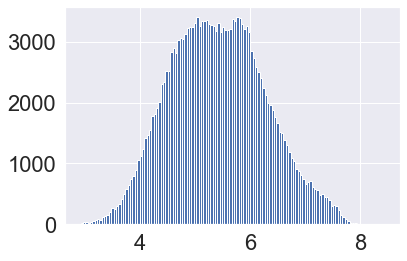

In [29]:
%matplotlib inline 
plt.hist(training_data['var_6'],bins='auto')

(array([2.000e+00, 0.000e+00, 4.000e+00, 4.000e+00, 4.000e+00, 2.000e+00,
        1.400e+01, 1.700e+01, 2.900e+01, 3.600e+01, 4.600e+01, 4.200e+01,
        6.000e+01, 1.060e+02, 1.430e+02, 2.410e+02, 3.110e+02, 5.350e+02,
        8.150e+02, 9.930e+02, 1.133e+03, 1.058e+03, 1.073e+03, 1.127e+03,
        1.187e+03, 1.263e+03, 1.280e+03, 1.500e+03, 1.633e+03, 1.765e+03,
        1.906e+03, 2.089e+03, 2.290e+03, 2.402e+03, 2.472e+03, 2.667e+03,
        2.715e+03, 2.854e+03, 3.090e+03, 3.051e+03, 3.241e+03, 3.220e+03,
        3.249e+03, 3.321e+03, 3.423e+03, 3.460e+03, 3.405e+03, 3.434e+03,
        3.425e+03, 3.334e+03, 3.339e+03, 3.468e+03, 3.353e+03, 3.388e+03,
        3.269e+03, 3.221e+03, 3.327e+03, 3.201e+03, 3.294e+03, 3.200e+03,
        3.280e+03, 3.218e+03, 3.279e+03, 3.246e+03, 3.204e+03, 3.223e+03,
        3.216e+03, 3.057e+03, 3.125e+03, 2.928e+03, 2.869e+03, 2.838e+03,
        2.699e+03, 2.626e+03, 2.518e+03, 2.608e+03, 2.465e+03, 2.384e+03,
        2.292e+03, 2.196e+03, 2.098e+0

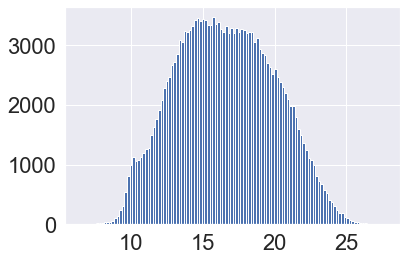

In [43]:
%matplotlib inline 
plt.hist(training_data['var_7'],bins='auto')

(array([3.000e+00, 1.000e+00, 7.000e+00, 5.000e+00, 7.000e+00, 1.100e+01,
        1.700e+01, 1.800e+01, 4.900e+01, 7.000e+01, 1.000e+02, 1.290e+02,
        1.440e+02, 1.710e+02, 2.300e+02, 2.660e+02, 3.230e+02, 3.850e+02,
        4.820e+02, 6.240e+02, 6.730e+02, 7.860e+02, 9.510e+02, 1.055e+03,
        1.136e+03, 1.290e+03, 1.477e+03, 1.670e+03, 1.806e+03, 1.869e+03,
        2.066e+03, 2.194e+03, 2.270e+03, 2.324e+03, 2.542e+03, 2.660e+03,
        2.651e+03, 2.795e+03, 2.884e+03, 2.947e+03, 3.115e+03, 3.003e+03,
        3.094e+03, 3.122e+03, 3.199e+03, 3.124e+03, 3.261e+03, 3.205e+03,
        3.118e+03, 3.163e+03, 3.149e+03, 3.191e+03, 3.131e+03, 3.194e+03,
        3.160e+03, 3.294e+03, 3.233e+03, 3.302e+03, 3.202e+03, 3.200e+03,
        3.375e+03, 3.306e+03, 3.321e+03, 3.419e+03, 3.466e+03, 3.461e+03,
        3.487e+03, 3.506e+03, 3.517e+03, 3.522e+03, 3.409e+03, 3.454e+03,
        3.449e+03, 3.195e+03, 3.206e+03, 3.015e+03, 2.930e+03, 2.787e+03,
        2.582e+03, 2.424e+03, 2.353e+0

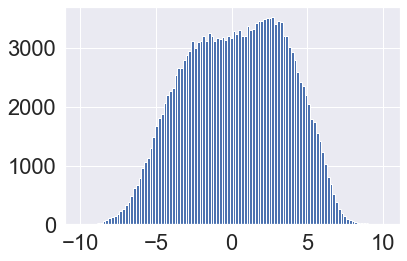

In [44]:
%matplotlib inline 
plt.hist(training_data['var_8'],bins='auto')

(array([1.000e+00, 0.000e+00, 1.000e+00, 6.000e+00, 1.300e+01, 7.400e+01,
        1.530e+02, 2.520e+02, 3.160e+02, 3.380e+02, 3.650e+02, 3.960e+02,
        3.720e+02, 4.440e+02, 4.770e+02, 5.350e+02, 6.110e+02, 6.600e+02,
        7.710e+02, 8.540e+02, 9.130e+02, 1.082e+03, 1.250e+03, 1.325e+03,
        1.570e+03, 1.702e+03, 1.914e+03, 1.981e+03, 2.129e+03, 2.283e+03,
        2.433e+03, 2.541e+03, 2.584e+03, 2.701e+03, 2.928e+03, 2.933e+03,
        2.986e+03, 2.963e+03, 2.922e+03, 2.947e+03, 3.266e+03, 3.189e+03,
        3.293e+03, 3.239e+03, 3.058e+03, 3.092e+03, 3.217e+03, 3.239e+03,
        3.150e+03, 3.169e+03, 3.208e+03, 3.182e+03, 3.222e+03, 3.620e+03,
        4.228e+03, 4.034e+03, 3.490e+03, 3.150e+03, 3.042e+03, 2.899e+03,
        3.056e+03, 3.100e+03, 3.148e+03, 3.321e+03, 3.368e+03, 3.351e+03,
        3.376e+03, 3.507e+03, 3.503e+03, 3.513e+03, 3.560e+03, 3.430e+03,
        3.459e+03, 3.314e+03, 3.048e+03, 2.982e+03, 2.665e+03, 2.475e+03,
        2.252e+03, 1.863e+03, 1.732e+0

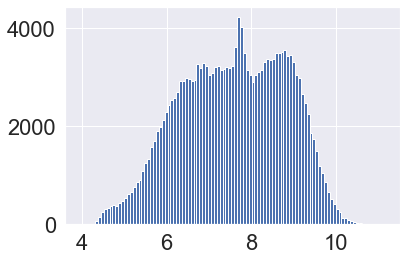

In [45]:
%matplotlib inline 
plt.hist(training_data['var_9'],bins='auto')

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        7.000e+00, 8.000e+00, 4.000e+00, 2.200e+01, 1.600e+01, 1.900e+01,
        2.200e+01, 2.500e+01, 3.400e+01, 5.300e+01, 5.900e+01, 8.400e+01,
        7.600e+01, 9.000e+01, 1.210e+02, 1.650e+02, 1.870e+02, 2.270e+02,
        2.440e+02, 2.750e+02, 3.370e+02, 3.620e+02, 4.270e+02, 4.840e+02,
        5.680e+02, 6.220e+02, 7.140e+02, 8.490e+02, 8.820e+02, 9.770e+02,
        1.028e+03, 1.174e+03, 1.294e+03, 1.415e+03, 1.461e+03, 1.534e+03,
        1.698e+03, 1.799e+03, 1.900e+03, 1.972e+03, 2.122e+03, 2.151e+03,
        2.186e+03, 2.356e+03, 2.452e+03, 2.462e+03, 2.584e+03, 2.780e+03,
        2.643e+03, 2.775e+03, 2.750e+03, 2.881e+03, 3.047e+03, 3.043e+03,
        3.013e+03, 3.039e+03, 3.138e+03, 3.165e+03, 3.334e+03, 3.422e+03,
        3.383e+03, 3.461e+03, 3.481e+03, 3.580e+03, 3.409e+03, 3.403e+03,
        3.585e+03, 3.503e+03, 3.423e+0

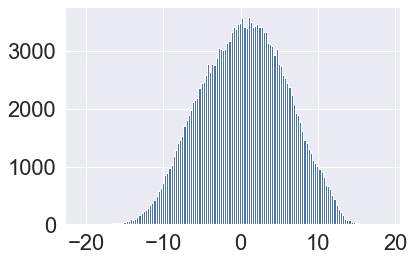

In [46]:
%matplotlib inline 
plt.hist(training_data['var_10'],bins='auto')

(array([4.300e+01, 5.000e+01, 5.000e+01, 8.000e+01, 6.700e+01, 9.600e+01,
        1.260e+02, 1.270e+02, 1.670e+02, 1.890e+02, 2.200e+02, 2.570e+02,
        3.010e+02, 3.190e+02, 3.640e+02, 4.130e+02, 4.430e+02, 5.520e+02,
        5.950e+02, 6.770e+02, 7.020e+02, 8.280e+02, 8.700e+02, 9.830e+02,
        1.079e+03, 1.238e+03, 1.250e+03, 1.339e+03, 1.540e+03, 1.572e+03,
        1.663e+03, 1.836e+03, 1.957e+03, 1.994e+03, 2.105e+03, 2.238e+03,
        2.289e+03, 2.392e+03, 2.617e+03, 2.610e+03, 2.701e+03, 2.718e+03,
        2.803e+03, 2.857e+03, 3.017e+03, 3.039e+03, 3.240e+03, 3.074e+03,
        3.292e+03, 3.363e+03, 3.223e+03, 3.371e+03, 3.211e+03, 3.321e+03,
        3.334e+03, 3.552e+03, 3.330e+03, 3.459e+03, 3.367e+03, 3.624e+03,
        3.432e+03, 3.380e+03, 3.369e+03, 3.440e+03, 3.376e+03, 3.409e+03,
        3.243e+03, 3.235e+03, 3.131e+03, 3.166e+03, 3.013e+03, 3.014e+03,
        2.814e+03, 2.719e+03, 2.610e+03, 2.450e+03, 2.358e+03, 2.389e+03,
        2.166e+03, 2.085e+03, 2.081e+0

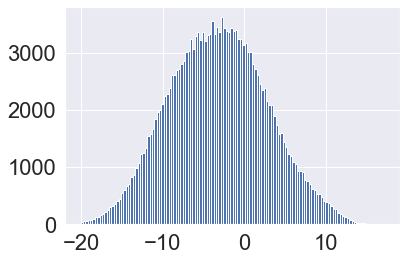

In [47]:
%matplotlib inline 
plt.hist(training_data['var_11'],bins='auto')

(array([5.000e+00, 1.000e+00, 5.000e+00, 5.000e+00, 4.000e+00, 8.000e+00,
        2.021e+03, 3.900e+02, 4.080e+02, 4.050e+02, 3.840e+02, 4.220e+02,
        4.060e+02, 4.350e+02, 4.500e+02, 4.940e+02, 5.230e+02, 5.120e+02,
        5.520e+02, 5.610e+02, 6.790e+02, 7.100e+02, 7.460e+02, 8.410e+02,
        9.360e+02, 1.022e+03, 1.046e+03, 1.125e+03, 1.318e+03, 1.378e+03,
        1.450e+03, 1.612e+03, 1.892e+03, 1.880e+03, 2.010e+03, 2.118e+03,
        2.292e+03, 2.505e+03, 2.518e+03, 2.621e+03, 2.772e+03, 2.854e+03,
        2.966e+03, 2.990e+03, 3.212e+03, 3.194e+03, 3.370e+03, 3.509e+03,
        3.434e+03, 3.556e+03, 3.423e+03, 3.604e+03, 3.521e+03, 3.312e+03,
        3.167e+03, 3.249e+03, 3.468e+03, 3.268e+03, 3.245e+03, 3.385e+03,
        3.329e+03, 3.192e+03, 3.274e+03, 3.270e+03, 3.197e+03, 3.131e+03,
        3.094e+03, 3.084e+03, 3.074e+03, 3.067e+03, 3.050e+03, 2.862e+03,
        2.904e+03, 2.911e+03, 2.809e+03, 2.742e+03, 2.610e+03, 2.440e+03,
        2.494e+03, 2.345e+03, 2.177e+0

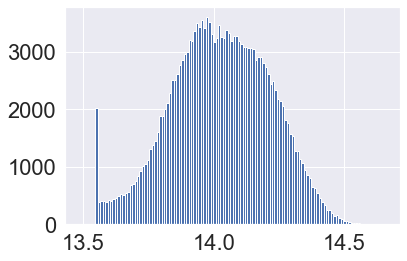

In [48]:
%matplotlib inline 
plt.hist(training_data['var_12'],bins='auto')

(array([2.000e+00, 3.000e+00, 3.000e+00, 3.200e+01, 8.000e+01, 1.720e+02,
        2.510e+02, 3.120e+02, 3.490e+02, 3.580e+02, 3.990e+02, 3.770e+02,
        4.350e+02, 3.630e+02, 4.390e+02, 4.750e+02, 5.090e+02, 5.430e+02,
        6.270e+02, 7.300e+02, 7.960e+02, 9.680e+02, 1.005e+03, 1.145e+03,
        1.293e+03, 1.414e+03, 1.529e+03, 1.730e+03, 1.813e+03, 1.918e+03,
        2.049e+03, 2.348e+03, 2.431e+03, 2.543e+03, 2.664e+03, 2.774e+03,
        2.800e+03, 2.924e+03, 2.935e+03, 3.086e+03, 3.035e+03, 3.096e+03,
        3.303e+03, 3.137e+03, 3.193e+03, 3.243e+03, 3.220e+03, 3.238e+03,
        3.254e+03, 3.307e+03, 3.357e+03, 3.410e+03, 3.780e+03, 3.897e+03,
        3.889e+03, 3.556e+03, 3.220e+03, 3.010e+03, 2.892e+03, 3.035e+03,
        3.009e+03, 3.076e+03, 3.125e+03, 3.207e+03, 3.285e+03, 3.207e+03,
        3.158e+03, 3.321e+03, 3.335e+03, 3.370e+03, 3.270e+03, 3.369e+03,
        3.269e+03, 3.306e+03, 3.095e+03, 3.002e+03, 2.791e+03, 2.693e+03,
        2.494e+03, 2.277e+03, 2.148e+0

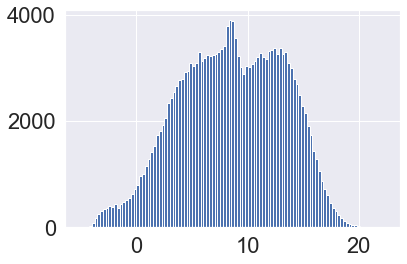

In [49]:
%matplotlib inline 
plt.hist(training_data['var_13'],bins='auto')

(array([1.000e+00, 2.000e+00, 3.000e+00, 5.000e+00, 6.000e+00, 9.000e+00,
        1.700e+01, 1.900e+01, 3.100e+01, 4.400e+01, 5.900e+01, 8.300e+01,
        1.340e+02, 2.070e+02, 3.090e+02, 4.560e+02, 6.400e+02, 7.750e+02,
        8.420e+02, 9.340e+02, 9.660e+02, 1.098e+03, 1.214e+03, 1.362e+03,
        1.463e+03, 1.615e+03, 1.818e+03, 1.956e+03, 2.098e+03, 2.213e+03,
        2.357e+03, 2.524e+03, 2.700e+03, 2.708e+03, 2.894e+03, 2.962e+03,
        3.128e+03, 3.161e+03, 2.984e+03, 3.224e+03, 3.249e+03, 3.253e+03,
        3.205e+03, 3.291e+03, 3.240e+03, 3.229e+03, 3.310e+03, 3.332e+03,
        3.271e+03, 3.278e+03, 3.317e+03, 3.336e+03, 3.251e+03, 3.324e+03,
        3.275e+03, 3.282e+03, 3.302e+03, 3.260e+03, 3.327e+03, 3.264e+03,
        3.191e+03, 3.266e+03, 3.315e+03, 3.324e+03, 3.154e+03, 3.233e+03,
        3.220e+03, 3.130e+03, 3.103e+03, 3.074e+03, 2.991e+03, 2.789e+03,
        2.780e+03, 2.700e+03, 2.710e+03, 2.451e+03, 2.387e+03, 2.236e+03,
        2.129e+03, 2.055e+03, 1.919e+0

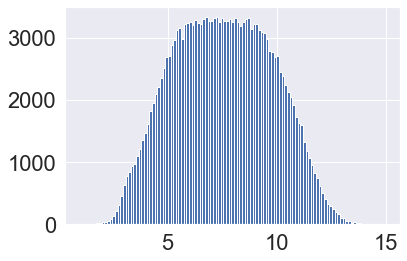

In [50]:
%matplotlib inline 
plt.hist(training_data['var_14'],bins='auto')

(array([6.000e+00, 1.300e+01, 1.600e+01, 2.100e+01, 2.100e+01, 2.900e+01,
        2.500e+01, 5.100e+01, 5.300e+01, 7.400e+01, 1.250e+02, 1.310e+02,
        1.560e+02, 2.020e+02, 2.350e+02, 2.870e+02, 3.500e+02, 4.090e+02,
        4.660e+02, 5.820e+02, 6.140e+02, 7.610e+02, 8.630e+02, 9.550e+02,
        1.095e+03, 1.141e+03, 1.378e+03, 1.417e+03, 1.676e+03, 1.710e+03,
        1.960e+03, 2.006e+03, 2.072e+03, 2.179e+03, 2.346e+03, 2.353e+03,
        2.513e+03, 2.652e+03, 2.702e+03, 2.728e+03, 2.845e+03, 2.889e+03,
        2.954e+03, 2.905e+03, 2.960e+03, 3.110e+03, 3.039e+03, 3.032e+03,
        3.101e+03, 3.234e+03, 3.308e+03, 3.245e+03, 3.429e+03, 3.417e+03,
        3.400e+03, 3.370e+03, 3.398e+03, 3.458e+03, 3.530e+03, 3.513e+03,
        3.435e+03, 3.438e+03, 3.353e+03, 3.488e+03, 3.283e+03, 3.304e+03,
        3.356e+03, 3.225e+03, 3.251e+03, 3.149e+03, 3.169e+03, 3.137e+03,
        2.987e+03, 3.018e+03, 2.845e+03, 2.752e+03, 2.510e+03, 2.522e+03,
        2.376e+03, 2.290e+03, 2.235e+0

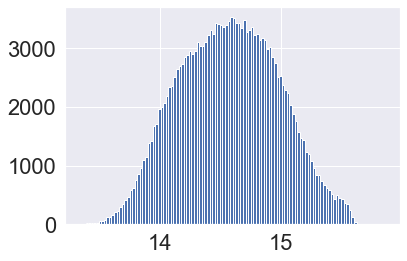

In [51]:
%matplotlib inline 
plt.hist(training_data['var_15'],bins='auto')

(array([1.200e+01, 1.700e+01, 3.200e+01, 2.100e+01, 3.500e+01, 6.200e+01,
        7.800e+01, 7.800e+01, 1.030e+02, 1.210e+02, 1.510e+02, 1.600e+02,
        2.140e+02, 2.330e+02, 2.780e+02, 3.070e+02, 3.570e+02, 4.530e+02,
        4.790e+02, 5.530e+02, 6.530e+02, 7.150e+02, 8.110e+02, 9.450e+02,
        1.025e+03, 1.201e+03, 1.270e+03, 1.378e+03, 1.515e+03, 1.597e+03,
        1.741e+03, 1.911e+03, 1.962e+03, 2.067e+03, 2.262e+03, 2.363e+03,
        2.440e+03, 2.596e+03, 2.675e+03, 2.840e+03, 2.839e+03, 3.040e+03,
        3.108e+03, 3.141e+03, 3.158e+03, 3.114e+03, 3.189e+03, 3.333e+03,
        3.258e+03, 3.305e+03, 3.393e+03, 3.292e+03, 3.353e+03, 3.428e+03,
        3.434e+03, 3.474e+03, 3.403e+03, 3.261e+03, 3.268e+03, 3.330e+03,
        3.233e+03, 3.136e+03, 3.163e+03, 3.108e+03, 3.054e+03, 3.032e+03,
        2.885e+03, 2.867e+03, 3.028e+03, 4.161e+03, 3.838e+03, 2.917e+03,
        2.795e+03, 2.666e+03, 2.610e+03, 2.488e+03, 2.426e+03, 2.222e+03,
        2.187e+03, 2.043e+03, 1.956e+0

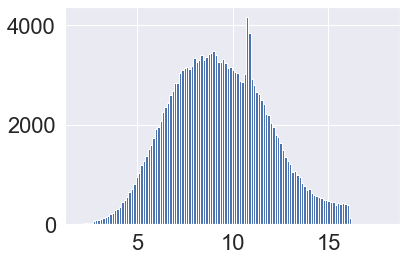

In [52]:
%matplotlib inline 
plt.hist(training_data['var_16'],bins='auto')

(array([3.500e+01, 4.800e+01, 6.300e+01, 6.600e+01, 7.800e+01, 9.200e+01,
        1.110e+02, 1.370e+02, 1.660e+02, 1.900e+02, 2.420e+02, 2.650e+02,
        2.890e+02, 3.290e+02, 3.580e+02, 4.780e+02, 5.090e+02, 5.370e+02,
        6.360e+02, 6.660e+02, 7.650e+02, 8.750e+02, 9.570e+02, 1.003e+03,
        1.146e+03, 1.190e+03, 1.305e+03, 1.404e+03, 1.554e+03, 1.591e+03,
        1.694e+03, 1.828e+03, 1.808e+03, 1.961e+03, 2.074e+03, 2.230e+03,
        2.212e+03, 2.430e+03, 2.427e+03, 2.511e+03, 2.635e+03, 2.744e+03,
        2.821e+03, 2.919e+03, 3.033e+03, 3.122e+03, 3.046e+03, 3.137e+03,
        3.320e+03, 3.314e+03, 3.343e+03, 3.407e+03, 3.382e+03, 3.445e+03,
        3.433e+03, 3.421e+03, 3.516e+03, 3.397e+03, 3.408e+03, 3.423e+03,
        3.373e+03, 3.474e+03, 3.326e+03, 3.292e+03, 3.309e+03, 3.188e+03,
        3.311e+03, 3.117e+03, 3.135e+03, 3.155e+03, 2.958e+03, 2.967e+03,
        2.854e+03, 2.863e+03, 2.662e+03, 2.670e+03, 2.544e+03, 2.502e+03,
        2.357e+03, 2.205e+03, 2.141e+0

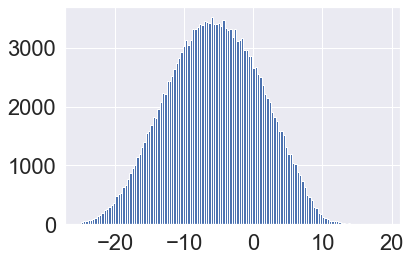

In [53]:
%matplotlib inline 
plt.hist(training_data['var_17'],bins='auto')

(array([2.000e+00, 4.000e+00, 7.000e+00, 7.000e+00, 1.200e+01, 1.000e+01,
        1.500e+01, 2.800e+01, 3.100e+01, 3.000e+01, 5.200e+01, 7.600e+01,
        1.270e+02, 1.240e+02, 1.660e+02, 2.090e+02, 2.380e+02, 3.190e+02,
        4.080e+02, 4.890e+02, 5.870e+02, 6.610e+02, 8.090e+02, 8.510e+02,
        1.011e+03, 1.152e+03, 1.367e+03, 1.478e+03, 1.625e+03, 1.810e+03,
        1.851e+03, 2.104e+03, 2.200e+03, 2.328e+03, 2.533e+03, 2.544e+03,
        2.635e+03, 2.855e+03, 2.800e+03, 2.922e+03, 2.950e+03, 3.035e+03,
        3.044e+03, 3.022e+03, 3.058e+03, 2.963e+03, 3.171e+03, 3.171e+03,
        3.099e+03, 3.177e+03, 3.120e+03, 3.262e+03, 3.379e+03, 3.308e+03,
        3.331e+03, 3.493e+03, 3.429e+03, 3.325e+03, 3.563e+03, 3.461e+03,
        3.390e+03, 3.397e+03, 3.306e+03, 3.463e+03, 3.306e+03, 3.355e+03,
        3.268e+03, 3.289e+03, 3.201e+03, 3.184e+03, 3.199e+03, 2.986e+03,
        2.883e+03, 2.914e+03, 2.897e+03, 2.823e+03, 2.596e+03, 2.456e+03,
        2.391e+03, 2.168e+03, 2.246e+0

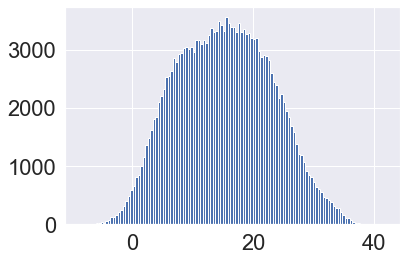

In [54]:
%matplotlib inline 
plt.hist(training_data['var_18'],bins='auto')

(array([2.000e+00, 1.000e+00, 8.000e+00, 2.000e+00, 4.000e+00, 1.400e+01,
        1.500e+01, 2.300e+01, 3.200e+01, 5.400e+01, 7.600e+01, 7.000e+01,
        1.170e+02, 1.550e+02, 1.930e+02, 2.560e+02, 3.040e+02, 3.760e+02,
        4.420e+02, 5.530e+02, 6.570e+02, 7.110e+02, 8.950e+02, 1.017e+03,
        1.198e+03, 1.285e+03, 1.499e+03, 1.583e+03, 1.711e+03, 1.939e+03,
        1.996e+03, 2.173e+03, 2.245e+03, 2.478e+03, 2.613e+03, 2.596e+03,
        2.697e+03, 2.774e+03, 2.672e+03, 2.815e+03, 2.905e+03, 2.873e+03,
        2.955e+03, 2.938e+03, 3.019e+03, 3.045e+03, 3.046e+03, 3.078e+03,
        3.176e+03, 3.258e+03, 3.240e+03, 3.452e+03, 3.377e+03, 3.351e+03,
        3.283e+03, 3.352e+03, 3.338e+03, 3.348e+03, 3.366e+03, 3.439e+03,
        3.400e+03, 3.312e+03, 3.360e+03, 3.347e+03, 3.359e+03, 3.355e+03,
        3.252e+03, 3.236e+03, 3.261e+03, 3.171e+03, 3.221e+03, 3.115e+03,
        3.107e+03, 2.984e+03, 2.908e+03, 2.765e+03, 2.827e+03, 2.609e+03,
        2.429e+03, 2.381e+03, 2.222e+0

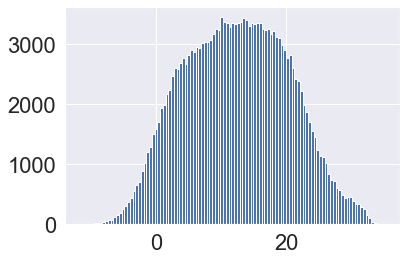

In [55]:
%matplotlib inline 
plt.hist(training_data['var_19'],bins='auto')

(array([1.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 4.000e+00, 1.300e+01,
        1.500e+01, 2.200e+01, 3.500e+01, 4.100e+01, 8.200e+01, 1.010e+02,
        1.870e+02, 2.680e+02, 4.310e+02, 5.910e+02, 7.360e+02, 8.710e+02,
        1.056e+03, 1.112e+03, 1.240e+03, 1.348e+03, 1.438e+03, 1.594e+03,
        1.705e+03, 1.944e+03, 2.122e+03, 2.233e+03, 2.523e+03, 2.613e+03,
        2.834e+03, 2.878e+03, 2.966e+03, 3.162e+03, 3.206e+03, 3.100e+03,
        3.265e+03, 3.324e+03, 3.314e+03, 3.321e+03, 3.370e+03, 3.327e+03,
        3.287e+03, 3.260e+03, 3.280e+03, 3.419e+03, 3.207e+03, 3.248e+03,
        3.349e+03, 3.368e+03, 3.213e+03, 3.227e+03, 3.255e+03, 3.232e+03,
        3.279e+03, 3.310e+03, 3.333e+03, 3.182e+03, 3.295e+03, 3.197e+03,
        3.306e+03, 3.107e+03, 3.084e+03, 3.176e+03, 3.193e+03, 3.196e+03,
        3.143e+03, 3.006e+03, 2.937e+03, 2.976e+03, 2.864e+03, 2.729e+03,
        2.595e+03, 2.572e+03, 2.409e+03, 2.288e+03, 2.196e+03, 2.054e+03,
        1.959e+03, 1.790e+03, 1.637e+0

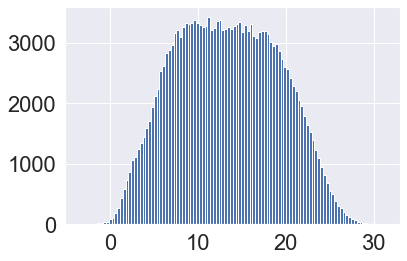

In [56]:
%matplotlib inline 
plt.hist(training_data['var_20'],bins='auto')

(array([1.900e+01, 2.700e+01, 3.300e+01, 6.100e+01, 7.400e+01, 8.000e+01,
        1.390e+02, 1.510e+02, 2.080e+02, 2.470e+02, 3.130e+02, 3.730e+02,
        4.000e+02, 5.290e+02, 5.850e+02, 6.040e+02, 6.880e+02, 6.820e+02,
        6.960e+02, 8.100e+02, 9.010e+02, 9.690e+02, 9.430e+02, 1.048e+03,
        1.069e+03, 1.181e+03, 1.245e+03, 1.266e+03, 1.389e+03, 1.487e+03,
        1.515e+03, 1.670e+03, 1.850e+03, 1.937e+03, 2.016e+03, 2.094e+03,
        2.271e+03, 2.382e+03, 2.415e+03, 2.493e+03, 2.701e+03, 2.702e+03,
        2.895e+03, 2.901e+03, 3.015e+03, 3.007e+03, 3.257e+03, 3.291e+03,
        3.314e+03, 3.453e+03, 3.480e+03, 3.539e+03, 3.489e+03, 3.498e+03,
        3.456e+03, 3.485e+03, 3.468e+03, 3.525e+03, 3.435e+03, 3.442e+03,
        3.273e+03, 3.287e+03, 3.299e+03, 3.303e+03, 3.242e+03, 3.413e+03,
        3.210e+03, 3.173e+03, 3.065e+03, 3.031e+03, 2.827e+03, 2.848e+03,
        2.868e+03, 2.764e+03, 2.698e+03, 2.663e+03, 2.339e+03, 2.342e+03,
        2.287e+03, 2.112e+03, 2.045e+0

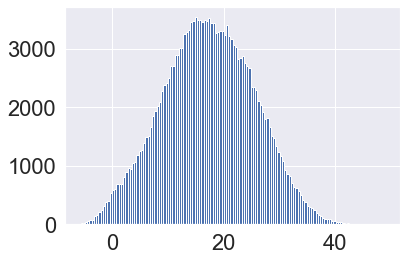

In [57]:
%matplotlib inline 
plt.hist(training_data['var_21'],bins='auto')

(array([9.000e+00, 6.000e+00, 1.900e+01, 2.000e+01, 2.500e+01, 2.700e+01,
        4.200e+01, 5.700e+01, 8.400e+01, 1.110e+02, 1.040e+02, 1.410e+02,
        1.850e+02, 1.920e+02, 2.660e+02, 2.740e+02, 3.760e+02, 4.230e+02,
        4.770e+02, 5.830e+02, 6.860e+02, 7.490e+02, 8.380e+02, 9.280e+02,
        1.065e+03, 1.173e+03, 1.266e+03, 1.517e+03, 1.540e+03, 1.640e+03,
        1.825e+03, 1.863e+03, 1.994e+03, 2.173e+03, 2.231e+03, 2.375e+03,
        2.516e+03, 2.666e+03, 2.814e+03, 2.778e+03, 2.887e+03, 3.017e+03,
        2.900e+03, 3.037e+03, 3.134e+03, 3.073e+03, 3.209e+03, 3.114e+03,
        3.291e+03, 3.137e+03, 3.355e+03, 3.198e+03, 3.238e+03, 3.316e+03,
        3.243e+03, 3.221e+03, 3.334e+03, 3.273e+03, 3.323e+03, 3.495e+03,
        3.379e+03, 3.458e+03, 3.555e+03, 3.488e+03, 3.407e+03, 3.203e+03,
        3.374e+03, 3.316e+03, 3.235e+03, 3.206e+03, 3.186e+03, 2.962e+03,
        2.897e+03, 2.910e+03, 2.862e+03, 2.633e+03, 2.491e+03, 2.425e+03,
        2.318e+03, 2.200e+03, 2.087e+0

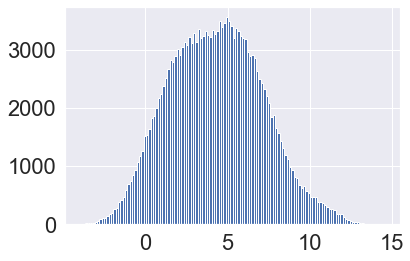

In [58]:
%matplotlib inline 
plt.hist(training_data['var_22'],bins='auto')

(array([5.000e+00, 4.000e+00, 1.400e+01, 1.100e+01, 1.700e+01, 1.800e+01,
        3.800e+01, 6.300e+01, 8.500e+01, 9.800e+01, 1.230e+02, 1.780e+02,
        2.090e+02, 2.680e+02, 3.230e+02, 3.770e+02, 4.240e+02, 5.550e+02,
        6.100e+02, 6.740e+02, 7.830e+02, 8.610e+02, 9.570e+02, 1.017e+03,
        1.109e+03, 1.180e+03, 1.316e+03, 1.296e+03, 1.489e+03, 1.538e+03,
        1.630e+03, 1.733e+03, 1.966e+03, 2.058e+03, 2.236e+03, 2.235e+03,
        2.351e+03, 2.482e+03, 2.701e+03, 2.677e+03, 2.898e+03, 2.855e+03,
        3.023e+03, 3.055e+03, 3.181e+03, 3.171e+03, 3.305e+03, 3.284e+03,
        3.369e+03, 3.394e+03, 3.434e+03, 3.496e+03, 3.373e+03, 3.345e+03,
        3.471e+03, 3.566e+03, 3.418e+03, 3.472e+03, 3.456e+03, 3.264e+03,
        3.342e+03, 3.290e+03, 3.326e+03, 3.334e+03, 3.274e+03, 3.151e+03,
        3.128e+03, 3.065e+03, 3.064e+03, 2.983e+03, 2.774e+03, 2.833e+03,
        2.814e+03, 2.771e+03, 2.636e+03, 2.552e+03, 2.515e+03, 2.544e+03,
        2.295e+03, 2.209e+03, 2.129e+0

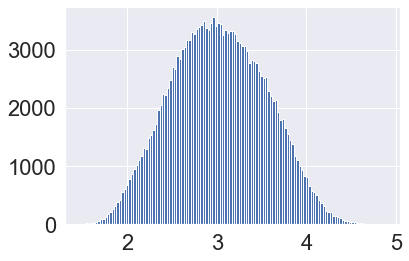

In [59]:
%matplotlib inline 
plt.hist(training_data['var_23'],bins='auto')

(array([1.200e+01, 1.500e+01, 2.300e+01, 2.000e+01, 2.600e+01, 2.800e+01,
        4.000e+01, 7.200e+01, 7.000e+01, 1.150e+02, 1.350e+02, 1.430e+02,
        2.230e+02, 2.250e+02, 2.810e+02, 3.550e+02, 4.100e+02, 4.670e+02,
        5.470e+02, 5.940e+02, 7.040e+02, 8.880e+02, 8.490e+02, 1.074e+03,
        1.158e+03, 1.283e+03, 1.357e+03, 1.425e+03, 1.576e+03, 1.609e+03,
        1.821e+03, 1.900e+03, 1.934e+03, 2.176e+03, 2.245e+03, 2.301e+03,
        2.406e+03, 2.614e+03, 2.672e+03, 2.732e+03, 2.794e+03, 2.884e+03,
        2.820e+03, 3.003e+03, 2.991e+03, 3.179e+03, 3.066e+03, 3.048e+03,
        3.000e+03, 3.111e+03, 3.077e+03, 3.224e+03, 3.104e+03, 3.199e+03,
        3.266e+03, 3.258e+03, 3.256e+03, 3.267e+03, 3.276e+03, 3.280e+03,
        3.401e+03, 3.348e+03, 3.371e+03, 3.415e+03, 3.517e+03, 3.463e+03,
        3.645e+03, 3.494e+03, 3.540e+03, 3.508e+03, 3.460e+03, 3.328e+03,
        3.318e+03, 3.252e+03, 3.242e+03, 3.126e+03, 2.980e+03, 2.800e+03,
        2.730e+03, 2.470e+03, 2.356e+0

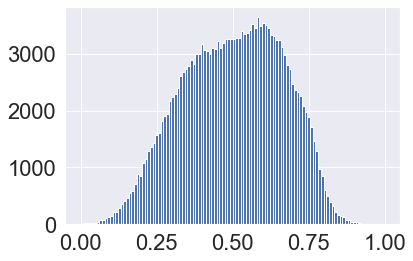

In [32]:
%matplotlib inline 
plt.hist(training_data['var_199'],bins='auto')

In [15]:
#apply normalization in training data
for i in cnames:
    print(i)
    training_data[i] = (training_data[i] - min(training_data[i]))/(max(training_data[i]) - min(training_data[i]))

var_0
var_1
var_2
var_3
var_4
var_5
var_6
var_7
var_8
var_9
var_11
var_12
var_13
var_14
var_15
var_16
var_17
var_18
var_19
var_20
var_21
var_22
var_23
var_24
var_25
var_26
var_27
var_28
var_29
var_30
var_31
var_32
var_33
var_34
var_35
var_36
var_37
var_38
var_39
var_40
var_41
var_42
var_43
var_44
var_45
var_46
var_47
var_48
var_49
var_50
var_51
var_52
var_53
var_54
var_55
var_56
var_57
var_58
var_59
var_60
var_61
var_62
var_63
var_64
var_65
var_66
var_67
var_68
var_69
var_70
var_71
var_72
var_73
var_74
var_75
var_76
var_77
var_78
var_79
var_80
var_81
var_82
var_83
var_84
var_85
var_86
var_87
var_88
var_89
var_90
var_91
var_92
var_92
var_93
var_94
var_95
var_96
var_97
var_98
var_99
var_100
var_101
var_102
var_103
var_104
var_105
var_106
var_107
var_108
var_109
var_110
var_111
var_112
var_113
var_114
var_115
var_116
var_117
var_118
var_119
var_120
var_121
var_122
var_123
var_124
var_125
var_126
var_127
var_128
var_129
var_130
var_131
var_132
var_133
var_134
var_135
var_136
var_137
var_13

In [31]:
#apply normalization on test data
for i in cnames:
    print(i)
    test_data[i] = (test_data[i] - min(test_data[i]))/(max(test_data[i]) - min(test_data[i]))


var_0
var_1
var_2
var_3
var_4
var_5
var_6
var_7
var_8
var_9
var_11
var_12
var_13
var_14
var_15
var_16
var_17
var_18
var_19
var_20
var_21
var_22
var_23
var_24
var_25
var_26
var_27
var_28
var_29
var_30
var_31
var_32
var_33
var_34
var_35
var_36
var_37
var_38
var_39
var_40
var_41
var_42
var_43
var_44
var_45
var_46
var_47
var_48
var_49
var_50
var_51
var_52
var_53
var_54
var_55
var_56
var_57
var_58
var_59
var_60
var_61
var_62
var_63
var_64
var_65
var_66
var_67
var_68
var_69
var_70
var_71
var_72
var_73
var_74
var_75
var_76
var_77
var_78
var_79
var_80
var_81
var_82
var_83
var_84
var_85
var_86
var_87
var_88
var_89
var_90
var_91
var_92
var_92
var_93
var_94
var_95
var_96
var_97
var_98
var_99
var_100
var_101
var_102
var_103
var_104
var_105
var_106
var_107
var_108
var_109
var_110
var_111
var_112
var_113
var_114
var_115
var_116
var_117
var_118
var_119
var_120
var_121
var_122
var_123
var_124
var_125
var_126
var_127
var_128
var_129
var_130
var_131
var_132
var_133
var_134
var_135
var_136
var_137
var_13

In [45]:
#now apply different machine learning algorithms to check which is perform better and selelct the best model


In [16]:
#Replace target categries with yes or no 
training_data['target']=training_data['target'].replace(0,'No')
training_data['target']=training_data['target'].replace(1,'Yes')

In [17]:
#Divide data into train and test
X = training_data.values[:, 2:203]
Y = training_data.values[:,1]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [31]:
#1::Decision Tree
clf = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

In [32]:
#predict new test cases
Y_predict = clf.predict(X_test)

In [33]:
Y_predict

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [34]:
#Error matrix for classification 
CM=confusion_matrix(y_test,Y_predict)

In [35]:
CM=pd.crosstab(y_test,Y_predict)

In [36]:
CM

col_0,No,Yes
row_0,,
No,30783,3107
Yes,3016,704


In [39]:
#let us save TP,TN,FP,FN
TN=CM.iloc[0,0]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
FP=CM.iloc[0,1]

In [37]:
#check accuracy of model
accuracy_score(y_test,Y_predict)*100

83.71975538420632

In [40]:
#Accuracy
((TP+TN)*100)/(TP+TN+FP+FN)

83.71975538420632

In [41]:
#False Negative Rate
(FN*100)/(FN+TP)

81.0752688172043

In [42]:
#Recall
(TP*100)/(TP+FN)

18.9247311827957

In [ ]:
#lets make a note for DT
#Accuracy=83.71
#FNR=81.07
#Recall=18.92

In [43]:
#::2:: Random Forest(Classsifier)
RF_model=RandomForestClassifier(n_estimators=100).fit(X_train,y_train)

In [44]:
#predict some test casses 
RF_predictions=RF_model.predict(X_test)

In [45]:
CM=confusion_matrix(y_test,RF_predictions)

In [46]:
CM=pd.crosstab(y_test,RF_predictions)

In [47]:
CM

col_0,No
row_0,
No,33890
Yes,3720


In [48]:
#let us save TP,TN,FP,FN
TN=CM.iloc[0,0]
FN=CM.iloc[1,0]





In [51]:
#check accuracy of model
accuracy_score(y_test,RF_predictions)*100

90.10901356022335

In [52]:
#Accuracy
((TP+TN)*100)/(TP+TN+FP+FN)

83.51802225924048

In [53]:
#False Negative Rate
(FN*100)/(FN+TP)

84.08679927667269

In [54]:
#Recall
(TP*100)/(TP+FN)

15.913200723327305

In [ ]:
#lets make a note for RF
#Accuracy=90.10
#FNR=83.51
#Recall=15.91

In [55]:
#::3::KNN implementation 
KNN_model=KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)


In [56]:
#predict test casses
KNN_predictions=KNN_model.predict(X_test)

In [57]:
KNN_predictions

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [58]:
CM=confusion_matrix(y_test,KNN_predictions)

In [59]:
CM=pd.crosstab(y_test,KNN_predictions)

In [60]:
CM

col_0,No,Yes
row_0,,
No,33883,7
Yes,3715,5


In [61]:
#let us save TP,TN,FP,FN
TN=CM.iloc[0,0]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
FP=CM.iloc[0,1]


In [62]:
#check accuracy of model
accuracy_score(y_test,KNN_predictions)*100

90.1036958255783

In [63]:
#Accuracy
((TP+TN)*100)/(TP+TN+FP+FN)

90.1036958255783

In [64]:
#False Negative Rate
(FN*100)/(FN+TP)

99.86559139784946

In [65]:
#Recall
(TP*100)/(TP+FN)

0.13440860215053763

In [ ]:
#lets make a note for KNN
#Accuracy=90.10
#FNR=99.86
#Recall=0.13

In [ ]:
#Naive Bays

In [18]:
Naive_bays_model=GaussianNB().fit(X_train,y_train)

In [19]:
#Predict test casess
NB_predictions=Naive_bays_model.predict(X_test)

In [20]:
NB_predictions

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U3')

In [21]:
CM=confusion_matrix(y_test,NB_predictions)

In [22]:
CM=pd.crosstab(y_test,NB_predictions)

In [23]:
CM

col_0,No,Yes
row_0,,
No,33313,567
Yes,2416,1314


In [24]:
#let us save TP,TN,FP,FN
TN=CM.iloc[0,0]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
FP=CM.iloc[0,1]

In [25]:
#check accuracy of model
accuracy_score(y_test,NB_predictions)*100

92.06859877692104

In [26]:
#Accuracy
((TP+TN)*100)/(TP+TN+FP+FN)

92.06859877692104

In [27]:
#False Negative Rate
(FN*100)/(FN+TP)

64.77211796246648

In [28]:
#Recall
(TP*100)/(TP+FN)

35.22788203753351

In [ ]:
#lets make a note for Naive Bays
#Accuracy=92.06
#FNR=64.77
#Recall=35.27

In [ ]:
#Naive Bayes have the maximum accuracy and lowest false negative rate amoung the above Machine Learning Algorithm so we will use Naive Bayes to predict our data

In [32]:
testing_data=test_data.values[:, 1:202]


In [34]:
Predictions=Naive_bays_model.predict(testing_data)

In [35]:
Predictions

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U3')

In [40]:
new_series = pd.Series(Predictions)

In [41]:
new_series.describe()

count     200000
unique         2
top           No
freq      189567
dtype: object

In [ ]:
new_series.to_csv("cust_predictions.csv",index=True)

In [54]:
cust_predictions=pd.read_csv("cust_predictions.csv",sep=',')

In [55]:
cust_predictions

,0,No
0,1,No
1,2,No
2,3,No
3,4,No
4,5,No
5,6,No
6,7,No
7,8,No
8,9,No
9,10,No


In [65]:
cust_predictions=cust_predictions.rename(columns={'0':'Index Number','No':'predictions'})

In [66]:
cust_predictions

,Index Number,predictions
0,1,No
1,2,No
2,3,No
3,4,No
4,5,No
5,6,No
6,7,No
7,8,No
8,9,No
9,10,No
